<a href="https://colab.research.google.com/github/ssenichev/cs102new/blob/homework06/homework06/Py_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Дескриптивный анализ данных

>$\color{red}{\text{Прежде чем перейти в выполнению заданий,}}$ 
$\color{red}{\text{через меню Файл подключите свой гугл-колаб к своему гитхабу. }}$
$\color{red}{\text{Создайте для этой работы отдельную ветку и папку – homework06.}}$

*Построение всех графиков выполняется только при помощи средств визуализации `Python`: `matplotlib`, `seaborn`, `pandas`. По каждому заданию должен быть сделан вывод. Для всех визуализаций используйте стиль `seaborn`. Обязательно добавляйте подпись графика и осей.* 

В этой практической работе вам предстоит провести анализ данных об особенностях жанров музыки. Датасет возьмите [отсюда](https://www.kaggle.com/vicsuperman/prediction-of-music-genre). Он содержит 41700 уникальных исполниителей.

Данные содержат 18 столбцов:
- `instance_id` - id строки датасета
- `artist_name` - исполнитель
- `track_name` - название трека
- `popularity` - индекс популярности трека
- `acousticness` - акустичность
- `danceability` - танцевальность (насколько трек подходит для танцев)
- `duration_ms` - длительность трека
- `energy` - энергичность трека
- `instrumentalness` - инструментальность
- `key` - регистр (высота тона)
- `liveness` - живость
- `loudness` - громкость
- `mode` - тональность
- `speechiness` - насколько много текста
- `tempo` - музыкальный темп
- `obtained_date` - дата загрузки трека в датасет
- `valence` - настроение
- `music_genre` - жанр

## Часть 1

Выполните все задания ниже с помощью библиотеки `pandas`.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
pip install seaborn notebook

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.4 MB/s eta 0:00:00


In [4]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Задание 1

1. Загрузите датасет `music_genre.csv`.
2. Возьмите 20 тысяч случайных строк из датасета (**все остальные задания выполняйте для этих 20 тысяч строк!!!**)
3. Проверьте, есть ли в датасете дублирующиеся строки. Если есть, удалите их.
4. Проверьте, есть ли а датасете строки, в которых значение в столбце `artist_name` – `empty_field`. Если есть, выведите эти строки и их количество. А затем удалите из датасета.

In [5]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/music_genre.csv')
df = df.sample(n=20000)
df = df.drop_duplicates()
df_ef = df.loc[df['artist_name'] == 'empty_field']
print(len(df_ef))
df_ef.head()

1014


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
38747,78067.0,empty_field,She's American,59.0,0.17500,0.643,270107.0,0.868,0.000463,C#,0.0794,-3.953,Major,0.0578,115.978,4-Apr,0.513,Rock
30290,42177.0,empty_field,24 Hours at a Time,32.0,0.00167,0.388,300253.0,0.893,0.262000,A,0.1470,-3.625,Major,0.0361,78.903,4-Apr,0.937,Blues
17340,85536.0,empty_field,Homebrew,38.0,0.00804,0.670,184000.0,0.896,0.000000,A,0.1490,-9.509,Major,0.0922,101.61,4-Apr,0.505,Alternative
2552,70957.0,empty_field,Saints & Sinners - Eliminate Remix,29.0,0.04850,0.611,264009.0,0.730,0.090000,G#,0.0930,-2.829,Minor,0.0587,134.94899999999998,4-Apr,0.329,Electronic
9137,37567.0,empty_field,Jugemu,17.0,0.01430,0.702,228053.0,0.814,0.000201,E,0.0747,-7.502,Minor,0.0412,125.95200000000001,4-Apr,0.928,Anime


In [6]:
df = df.drop(df[df['artist_name'] == 'empty_field'].index)
df

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10009,38711.0,Masayoshi Takanaka,Samba Pati,36.0,0.03450,0.473,342867.0,0.8230,0.446000,G,0.306,-6.625,Major,0.0630,104.694,4-Apr,0.3830,Jazz
47463,85956.0,Moneybagg Yo,Wit This Money,50.0,0.07010,0.786,181449.0,0.6140,0.000000,C,0.446,-5.235,Major,0.2110,140.028,4-Apr,0.0878,Hip-Hop
43092,36303.0,Gustav Mahler,"Symphony No. 8 in E-Flat Major - ""Symphony of ...",4.0,0.90900,0.151,202573.0,0.0153,0.627000,G#,0.118,-39.497,Major,0.0412,104.152,4-Apr,0.0447,Classical
33374,29868.0,Howlin' Wolf,Back Door Man,38.0,0.74700,0.528,173533.0,0.5920,0.000001,A,0.203,-14.041,Minor,0.0621,?,4-Apr,0.9250,Blues
38028,83756.0,Days Of The New,Shelf In The Room,53.0,0.03590,0.623,283973.0,0.5940,0.000137,B,0.144,-8.994,Major,0.0263,128.936,4-Apr,0.3360,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,41275.0,Kai Wachi,Eminence,26.0,0.00378,0.804,189370.0,0.6850,0.704000,E,0.110,-7.404,Minor,0.0521,?,4-Apr,0.2220,Electronic
30738,71021.0,The Marcus King Band,Fraudulent Waffle,29.0,0.05740,0.245,320694.0,0.8080,0.851000,F,0.286,-8.328,Minor,0.1810,67.748,4-Apr,0.2510,Blues
2620,55466.0,Sneaker Pimps,Kiro TV,36.0,0.00594,0.646,223640.0,0.7850,0.101000,D,0.132,-4.319,Major,0.0355,139.001,4-Apr,0.3360,Electronic
3899,47820.0,Rusko,Look Out!,35.0,0.01290,0.769,213560.0,0.8310,0.016700,C#,0.174,-1.207,Minor,0.0534,?,4-Apr,0.0716,Electronic


### Задание 2

1. Выведите долю каждого жанра в датасете.
2. Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.
3. Найдите самый танцевальный жанр. У самого танцевального жанра среднее значение показателя danceability должно быть наивысшим.
4. Для каждого жанра определите, какая тональность в нем преобладает – количество треков какой тональность больше (минор или мажор).

In [7]:
# 1
genres = list(df['music_genre'].unique())
genres.pop()
count = []
percentage = []
for genre in genres:
  count.append(len(df[df['music_genre'] == genre]))
  percentage.append((len(df[df['music_genre'] == genre]) / len(df)) * 100)

df_dict = pd.DataFrame({"genre": genres, "amount": count, "percantage": percentage})
df_dict


,genre,amount,percantage
0,Jazz,1920,10.113780
1,Hip-Hop,1876,9.882006
2,Classical,1906,10.040034
3,Blues,1842,9.702908
4,Rock,1927,10.150653
5,Country,1877,9.887273
6,Anime,1924,10.134850
7,Alternative,1893,9.971555
8,Electronic,1894,9.976823
9,Rap,1924,10.134850


<Axes: xlabel='amount', ylabel='genre'>

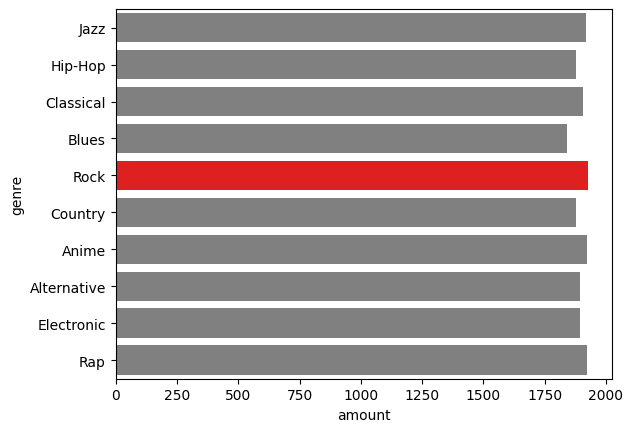

In [8]:
# 2
clrs = ['grey' if (x < max(df_dict['amount'].values.tolist())) else 'red' for x in df_dict['amount'].values.tolist()]
sns.barplot(x=df_dict['amount'], y=df_dict['genre'], palette=clrs, orient='h')

In [9]:
# 3
d = pd.DataFrame(columns=['genre', 'tempo'])
for genre in genres:
  temp = df[df['music_genre'] == genre]
  d.loc[len(d)] = [genre, temp['danceability'].mean()]
  
d.loc[d['tempo'].idxmax()]

genre     Hip-Hop
tempo    0.714851
Name: 1, dtype: object

In [10]:
# 4
minmaj = pd.DataFrame(columns=['genre', 'minor', 'major', 'max_am'])
for genre in genres:
  temp = df[df['music_genre'] == genre]
  min = len(temp[temp['mode'] == 'Minor'])
  maj = len(temp[temp['mode'] == 'Major'])
  minmaj.loc[len(minmaj)] = [genre, min, maj, 'minor' if min >= maj else 'major']
  
minmaj

,genre,minor,major,max_am
0,Jazz,899,1021,major
1,Hip-Hop,803,1073,major
2,Classical,624,1282,major
3,Blues,558,1284,major
4,Rock,487,1440,major
5,Country,239,1638,major
6,Anime,711,1213,major
7,Alternative,676,1217,major
8,Electronic,876,1018,major
9,Rap,848,1076,major


### Задание 3

1. Выведите исполнителя, у которого больше всего треков в датасете. И того, у которого их меньше всех.
2. Покажите на горизонтральной столбиковой диаграмме топ-20 исполнителей. Изучите результат и сделайте выводы.

In [11]:
df['artist_name'].value_counts().idxmax(), df['artist_name'].value_counts().idxmin()

('Nobuo Uematsu', 'Chuck Mangione')

<Axes: >

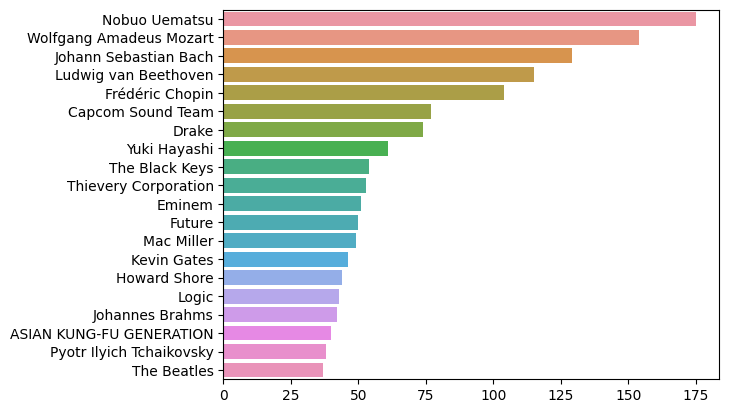

In [12]:
top20 = df['artist_name'].value_counts().nlargest(20)
sns.barplot(x=top20.values, y=top20.index, orient='h')

### Задание 4

1. Постройте корреляционную матрицу для характеристик треков. Между какими характеристиками сильная корреляция? Между какими слабая? Есть ли характеристики, между которыми корреляции практически нет.
2. Посчитайте корреляцию между популярностью (popularity) и длиной названия трека.

<ipython-input-13-960cd7893279>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.drop('instance_id', axis=1).corr()


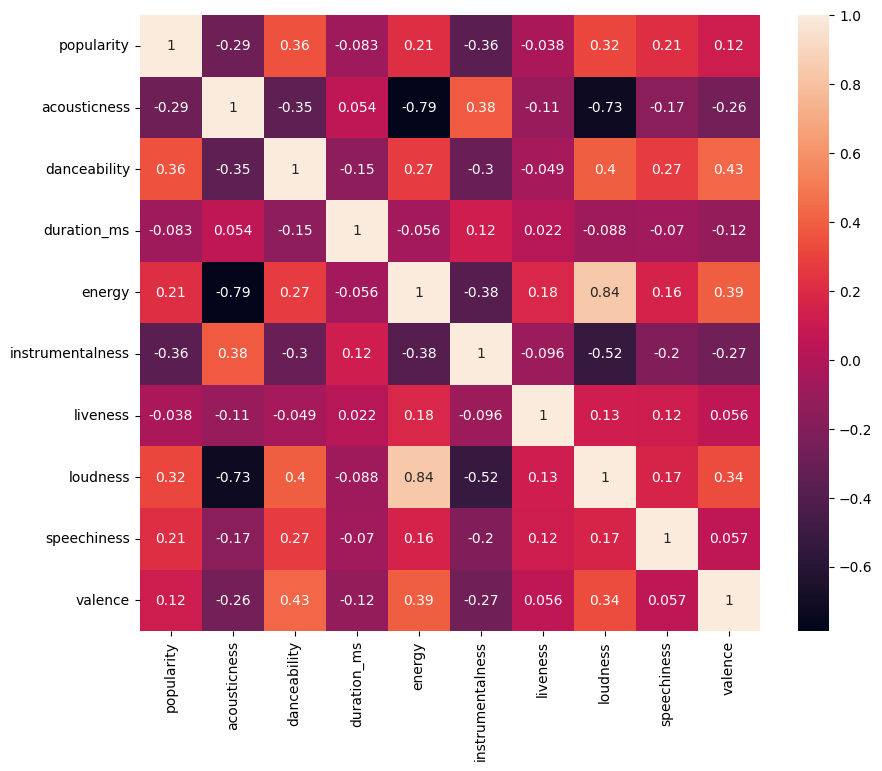

In [13]:
correlation_matrix = df.drop('instance_id', axis=1).corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

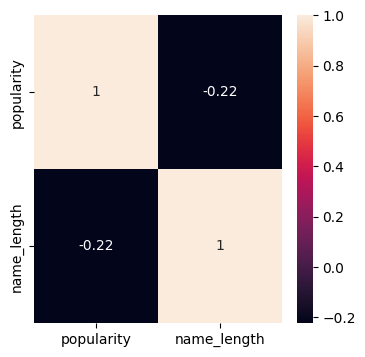

In [18]:
popularity_len = {'popularity':df.popularity, 'name_length': [len(str(x)) for x in df.track_name]}
popularity_len_corr = pd.DataFrame(data=popularity_len).corr()
plt.figure(figsize=(4,4))
sns.heatmap(popularity_len_corr, annot=True)
plt.show()

### Задание 5

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

<Axes: xlabel='Popularity', ylabel='Genres'>

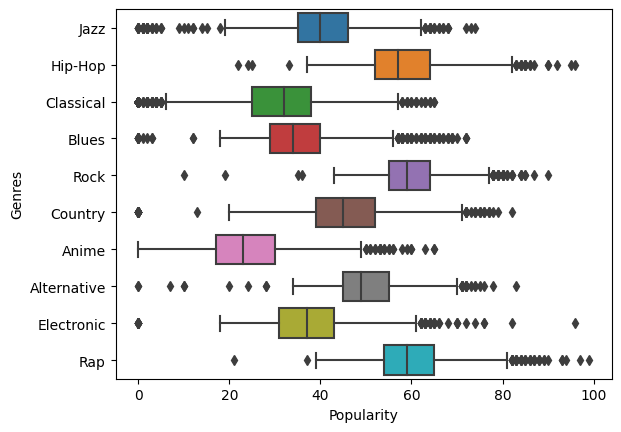

In [14]:
df5 = pd.DataFrame().assign(Genres=df['music_genre'], Popularity=df['popularity'])
sns.boxplot(y=df5["Genres"], x=df5["Popularity"])

### Задание 6

Для топ-3 жанров покажите на круговой диаграмме с группировкой самого популярного исполнителя. Диаграмма должна быть одна.

([<matplotlib.patches.Wedge at 0x7fcd12accfa0>,
 [Text(-0.6173058071716769, 0.9104578740568531, 'Nobuo Uematsu'),
  Text(0.13372782520259524, -1.09184104555864, 'The Beatles'),
  Text(0.9787511509798588, -0.5020420146318454, 'Drake')])

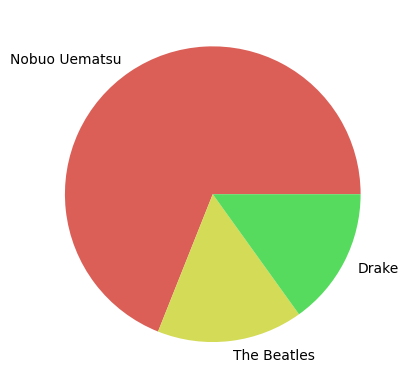

In [15]:
top3_genres = df['music_genre'].value_counts().nlargest(3).index
list_true_false = [entry in top3_genres for entry in df["music_genre"]]
genres_artists = (
    df[["artist_name", "music_genre"]]
    .loc[list_true_false]
    .value_counts(sort=True)
    .reset_index()
    .drop_duplicates(subset=["music_genre"])
)
val = genres_artists[0].tolist()
art_name = genres_artists["artist_name"].tolist()
genre_name = genres_artists["music_genre"].tolist()

plt.pie(val, labels=art_name, colors=sns.color_palette("hls"))

### Задание 7

На вертикальной столбиковой диаграмме для самого популярного (popularity) и самого непопулярного жанров покажите средние значения по всем характеристикам. Отрицательные и положительные значения характеристик показывайте разными цветами.

In [ ]:
df_mean = pd.DataFrame()

for genre in genres:
  mean = df[df["music_genre"] == genre].mean()
  df_mean = df_mean.append(mean, ignore_index=True)

df_mean = df_mean.drop(["instance_id"], axis=1)
df_mean = df_mean.drop(["duration_ms"], axis=1)
df_mean = df_mean.set_index(pd.Index(genres))

In [69]:
df_mean

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence
Jazz,40.569792,0.490821,0.588939,0.484747,0.348701,0.178957,-11.073674,0.074849,0.513023
Hip-Hop,58.519190,0.174750,0.714851,0.645560,0.011063,0.203485,-6.811681,0.201986,0.478781
Classical,29.519412,0.865143,0.307526,0.181380,0.599876,0.157713,-21.423520,0.050400,0.215043
Blues,35.059175,0.318409,0.526467,0.616383,0.092362,0.231923,-8.923954,0.062270,0.578958
Rock,59.827711,0.196313,0.537271,0.683507,0.056503,0.185186,-7.266100,0.052691,0.513741
Country,46.048482,0.269645,0.581107,0.641676,0.006141,0.196401,-7.382319,0.050598,0.546085
Anime,24.174116,0.286475,0.473299,0.666320,0.270056,0.195555,-7.920756,0.065098,0.439783
Alternative,50.340201,0.160328,0.541971,0.712538,0.065259,0.199287,-6.507978,0.089767,0.447481
Electronic,37.980993,0.119892,0.617871,0.740526,0.351922,0.211116,-7.066974,0.100708,0.384787
Rap,60.664761,0.168922,0.698089,0.652535,0.007545,0.196693,-6.642307,0.185307,0.452651


In [70]:
df_mean = df_mean.sort_values(by="popularity", ascending=False)
df_mean = df_mean.drop(["popularity"], axis=1)

top_g = df_mean.iloc[0]
bottom_g = df_mean.iloc[-1]
top_g, bottom_g

(acousticness        0.168922
 danceability        0.698089
 energy              0.652535
 instrumentalness    0.007545
 liveness            0.196693
 loudness           -6.642307
 speechiness         0.185307
 valence             0.452651
 Name: Rap, dtype: float64,
 acousticness        0.286475
 danceability        0.473299
 energy              0.666320
 instrumentalness    0.270056
 liveness            0.195555
 loudness           -7.920756
 speechiness         0.065098
 valence             0.439783
 Name: Anime, dtype: float64)

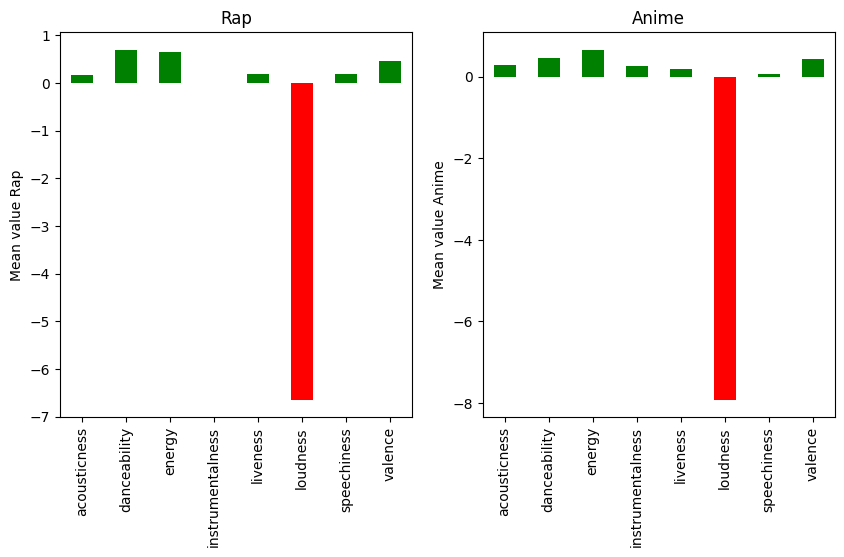

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].set_title(top_g.name)
ax[1].set_title(bottom_g.name)

ax[0].set_ylabel(f"Mean value {top_g.name}")
ax[1].set_ylabel(f"Mean value {bottom_g.name}")
ax[0].set_xticks(range(len(df_mean.columns)))
ax[1].set_xticks(range(len(df_mean.columns)))
ax[0].set_xticklabels(df_mean.columns, rotation=90)
ax[1].set_xticklabels(df_mean.columns, rotation=90)


top_g.plot.bar(ax=ax[0], color=["green" if x > 0 else "red" for x in top_g])
bottom_g.plot.bar(ax=ax[1], color=["green" if x > 0 else "red" for x in bottom_g])
plt.show()

### Задание 8

1. Добавьте в данные категориальный столбец `длительность_трека`, в котором будут значения: "короткая" (<=3min), "средняя" (>3min, <=5min), "длинная" (>5min). 
2. Покажите график плотности распределения данных в столбце `loudness`, сгруппированных по категориям длительности.
3. На круговой диаграмме вида "пончик" покажите численное соотношение треков разной длительности.

In [ ]:
val_ = df["duration_ms"] * 0.001 / 60
conditions = [val_ <= 3, val_ > 5]
values = ["короткая", "длинная"]
df["track_length"] = np.select(conditions, values)
df["track_length"] = df["track_length"].replace("0", "средняя")
df.head()

In [ ]:
track_len_labels = df["track_length"].value_counts().reset_index()["index"].tolist()
total = sum(df["track_length"].value_counts())
plt.pie(df["track_length"].value_counts(), labels=track_len_labels, autopct=lambda p: "{:.0f}".format(p * total / 100))
centre_circle = plt.Circle((0, 0), 0.70, fc="white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)